<a href="https://colab.research.google.com/github/innocentgodson/DecisionTree/blob/main/Decision_Tree_Drug_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Decision Trees**

**Objectives**

After completing this lab you will be able to:

*   Develop a classification model using Decision Tree Algorithm


In this lab exercise, you will learn a popular machine learning algorithm, Decision Trees. You will use this classification algorithm to build a model from the historical data of patients, and their response to different medications. Then you will use the trained decision tree to predict the class of an unknown patient, or to find a proper drug for a new patient.

**Table of contents**

1.   About the dataset
2.   Downloading the Data
3.   Pre-processing
4.   Setting up the Decision Tree
5.   Modeling
6.   Prediction
7.   Evaluation
8.   Visualization
















**About the dataset**

Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.

Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.

It is a sample of multiclass classifier, and you can use the training part of the dataset to build a decision tree, and then use it to predict the class of an unknown patient, or to prescribe a drug to a new patient.

**Importing required libraries**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

**Downloading the dataset, and read it directly into a dataframe from the IBM Object Storage and save it in a folder on Google drive.**


In [ ]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv",delimiter=",")
df.to_csv("//content/drive/MyDrive/BellsDataset/DecisionTreeDrugclass/drug200.csv", index=False)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


**Size of your data**

In [ ]:
df.shape

(200, 6)

**Pre-processing**

Defining Features X and Target y

In [ ]:
X = df.drop('Drug', axis=1)

In [ ]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [ ]:
y = df['Drug']

y.head()

,Drug
0,drugY
1,drugC
2,drugC
3,drugX
4,drugY


As you may figure out, some features in this dataset are categorical, such as **Sex**, **BP** and **Cholestero**l. Unfortunately, Sklearn Decision Trees does not handle categorical variables. We can still convert these features to numerical values using the LabelEncoder() method to convert the categorical variable into dummy/indicator variables.

**What is LabelEncoder?**

**LabelEncoder **is a preprocessing utility in machine learning (commonly from scikit-learn) used to convert categorical labels (usually text) into numeric values so that algorithms can process them.

**Key Characteristics**

*   It maps each unique category to an integer.

**Example Mapping**

["Glo", "MTN", "Airtel", "MTN", "Glo"]

        ↓ LabelEncoder
[2, 3, 1, 3, 2]  (actual numbers may differ depending on sorting)

**Implementation in Python**

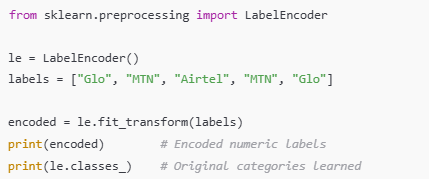

**Output**

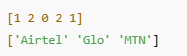




**Importance of Encoding These Features**

Encoding is critical for the following reasons:

**a. Algorithms only process numbers**

Most ML models (KNN, Logistic Regression, SVM, Neural Nets, etc.) cannot interpret text. Encoding ensures compatibility.

**b. Prevents model misinterpretation**

BP is nominal, not ordinal.

*   If encoded as integers like 0,1,2, a model may think: HIGH > NORMAL > LOW, which is not medically meaningful.
*   One-hot encoding removes that risk by giving each category equal weight.

**c. Enables distance-based models to function correctly**

Algorithms like KNN relies on distance calculations, so all categorical values must be numeric and properly scaled/encoded to avoid distortions.

**d. Allows reverse mapping for predictions**

Encoding the target (Drug) makes it possible to:

*   Train the model
*   Predict classes
*   Convert them back to original drug names for interpretation

**Setting up the Decision Tree**

**Train_Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 5) (160,)
Test set: (40, 5) (40,)


**Applying LabelEncoder on Sex, BP and Cholesterol**

In [ ]:
from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
le_BP = LabelEncoder()
le_Chol = LabelEncoder()

df['Sex'] = le_sex.fit_transform(df['Sex'])
df['BP'] = le_BP.fit_transform(df['BP'])
df['Cholesterol'] = le_Chol.fit_transform(df['Cholesterol'])

df.head(100)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY
...,...,...,...,...,...,...
95,36,1,1,1,11.424,drugX
96,58,0,1,0,38.247,drugY
97,56,0,0,0,25.395,drugY
98,20,1,0,1,35.639,drugY


**Print the encoded numeric values**

In [ ]:
print(df['Sex'].unique())
print(df['BP'].unique())
print(df['Cholesterol'].unique())

[0 1]
[0 1 2]
[0 1]


**Print the original categories**

In [ ]:
print(le_sex.classes_)
print(le_BP.classes_)
print(le_Chol.classes_)

['F' 'M']
['HIGH' 'LOW' 'NORMAL']
['HIGH' 'NORMAL']


**Modelling**

**Use a Pipeline with ColumnTransformer**

*   This guarantees no string-to-float errors
*   Prevents data leakage
*   Handles future unseen categories

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

categorical_cols = X_train.select_dtypes(include='object').columns
numeric_cols = X_train.select_dtypes(exclude='object').columns

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)

dt_model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', DecisionTreeClassifier(
        criterion="entropy",
        max_depth=4,
        random_state=42
    ))
])

dt_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Sex', 'BP', 'Cholesterol'], dtype='object')),
                                                 ('num', 'passthrough',
                                                  Index(['Age', 'Na_to_K'], dtype='object'))])),
                ('classifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=4,
                                        random_state=42))])

In [ ]:
y_pred = dt_model.predict(X_test)

In [ ]:
import pandas as pd

comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

comparison.head(20)


,Actual,Predicted
95,drugX,drugX
15,drugY,drugY
30,drugX,drugX
158,drugC,drugC
128,drugY,drugY
115,drugY,drugY
69,drugY,drugY
170,drugX,drugX
174,drugA,drugA
45,drugX,drugX


**Predict on a new single observation**

In [229]:
new_sample = pd.DataFrame([{
    'Age': 45,
    'Sex': 'F',
    'BP': 'HIGH',
    'Cholesterol': 'NORMAL',
    'Na_to_K': 12.5   # numeric value, not string
}])

# Run prediction
prediction = dt_model.predict(new_sample)
print(prediction)

['drugA']


**Evaluate the classification model**

**Classification report**

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11
       drugY       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



**Accuracy**

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_pred))

DecisionTrees's Accuracy:  1.0


**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[ 6,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0],
       [ 0,  0,  5,  0,  0],
       [ 0,  0,  0, 11,  0],
       [ 0,  0,  0,  0, 15]])

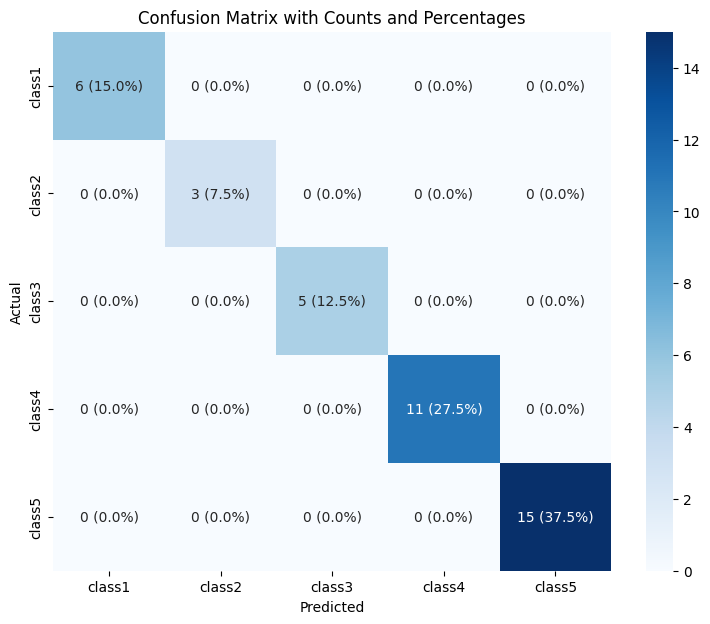

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Confusion matrix
cm = np.array([[6, 0, 0, 0, 0],
               [0, 3, 0, 0, 0],
               [0, 0, 5, 0, 0],
               [0, 0, 0, 11, 0],
               [0, 0, 0, 0, 15]])

class_names = ['class1','class2','class3','class4','class5']  # replace with your actual class names

# Calculate percentages
cm_percent = cm / cm.sum() * 100

# Create annotation labels with both count and percentage
labels = np.array([["{} ({:.1f}%)".format(cm[i,j], cm_percent[i,j]) for j in range(cm.shape[1])]
                   for i in range(cm.shape[0])])

plt.figure(figsize=(9,7))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix with Counts and Percentages')
plt.show()

**Visualization**

**Step 1: Import required tools**

In [227]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

**Step 2: Extract the trained decision tree from the Pipeline**

In [ ]:
tree_model = dt_model.named_steps['classifier']

**Step 3: Get feature names after One-Hot Encoding (IMPORTANT)**

Because you used OneHotEncoder, feature names are transformed.

In [ ]:
# Get categorical feature names
ohe = dt_model.named_steps['preprocessing'].named_transformers_['cat']
cat_feature_names = ohe.get_feature_names_out(categorical_cols)

# Combine with numeric feature names
feature_names = list(cat_feature_names) + list(numeric_cols)

**Step 4: Visualize the decision tree**

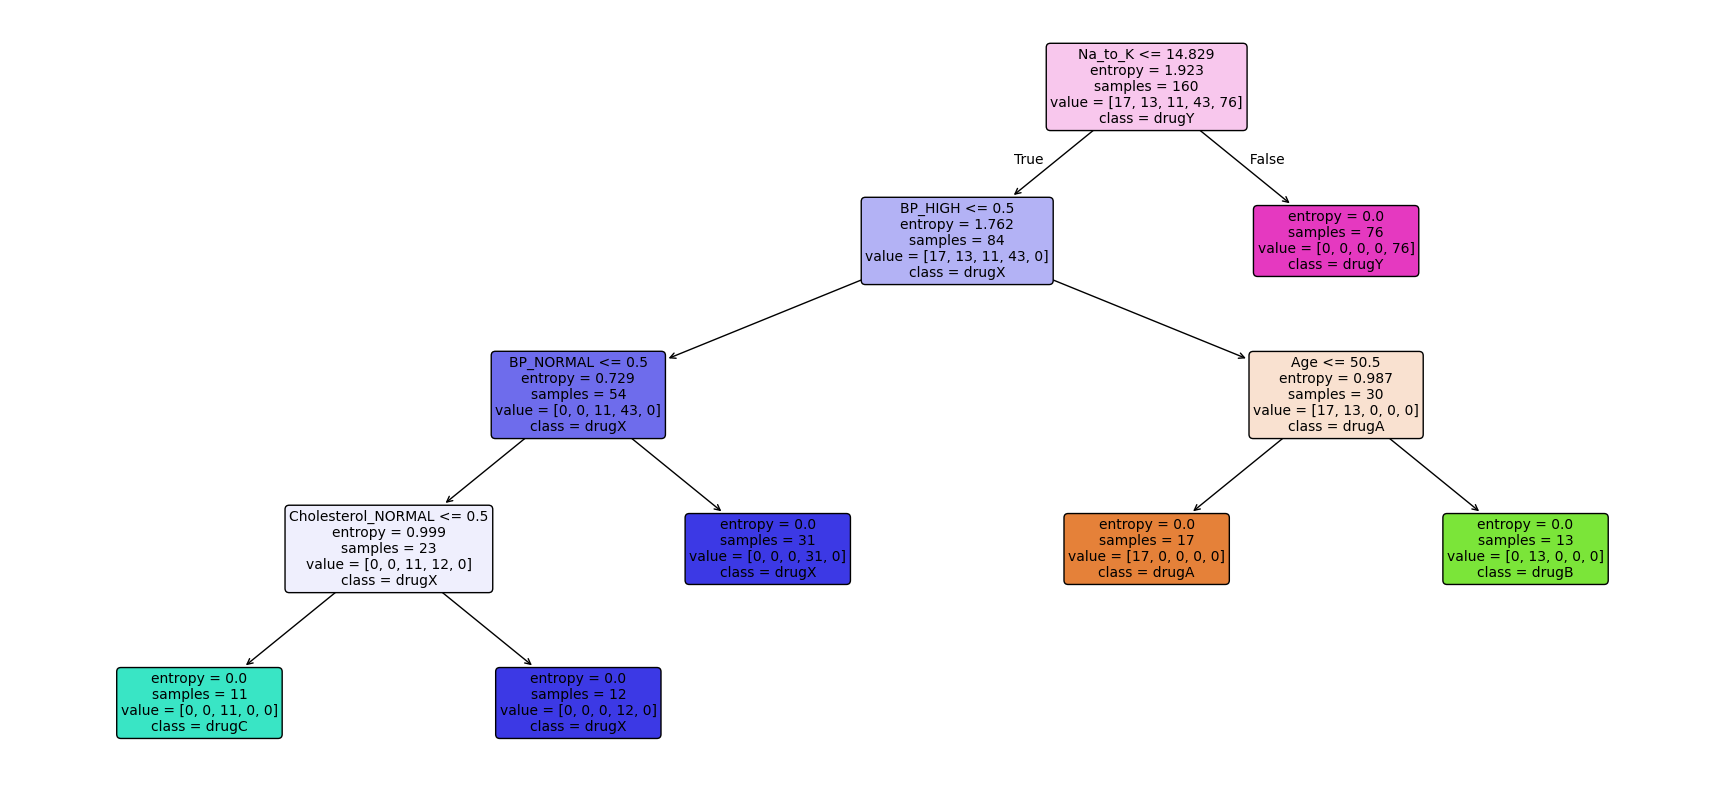

In [ ]:
plt.figure(figsize=(22, 10))
plot_tree(
    tree_model,
    feature_names=feature_names,
    class_names=tree_model.classes_.astype(str),
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

**What this visualization shows**

Each node displays:

*   Splitting feature
*   Entropy
*   Number of samples
*   Class distribution
*   Predicted class
*   Color intensity indicates class purity.

The decision tree visualization illustrates the hierarchical decision rules learned from the data, where internal nodes represent feature-based splits and leaf nodes correspond to class predictions with maximum information gain.